# FordGoBike Trip Data Exploration
## by Yalçın Filiz

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gather Data 

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# check for data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.shape

(183412, 16)

In [5]:
# check for descriptive stats 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Assess Data Quality 

In [6]:
# check for duplicate 
df.duplicated().sum()

0

In [7]:
# check for null values 
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df.end_station_id.value_counts()

67.0     4857
58.0     3973
21.0     3647
15.0     3368
3.0      2997
         ... 
51.0        9
300.0       7
224.0       6
344.0       6
301.0       5
Name: end_station_id, Length: 329, dtype: int64

In [9]:
df.start_station_id.value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [10]:
df.bike_id.value_counts()

4794    191
4814    176
5014    174
4422    174
5175    173
       ... 
5647      1
3655      1
1194      1
3114      1
5891      1
Name: bike_id, Length: 4646, dtype: int64

In [11]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [12]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [13]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [14]:
df.member_birth_year

0         1984.0
1            NaN
2         1972.0
3         1989.0
4         1974.0
           ...  
183407    1996.0
183408    1984.0
183409    1990.0
183410    1988.0
183411    1989.0
Name: member_birth_year, Length: 183412, dtype: float64

### Assesment Findings 

1. start_time & end_time must be in time format. 
2. start_station_id,end_station_id,bike id must be in object format. 
3. user_type, member_gender must be in category format. 
4. We should add a new column to calcute age from birth dat & member_birth must be in integer format. 
5. We should add a few new columns to calculate riding duration in different units such as minute, week, day etc.We need that to plot more readable graphs and better analysis. 
6. Birtdates column have some incorrect entries. 


### Clean Data 

In [15]:
# copy data frame for cleaning 
df_clean = df.copy()

In [16]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Define : First 3 issues --> Convert data types to the correct one

#### Code

In [17]:
# fix columns with correct dtypes. 

# convert to date_time 
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

# convert to object 
df_clean.start_station_id = df_clean.start_station_id.astype('str')
df_clean.end_station_id = df_clean.end_station_id.astype('str') 
df_clean.bike_id = df_clean.bike_id.astype('str') 

#convert to category 
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category') 




#### Test

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

#### Define :  Add a new column as age. Subtract birth year from 2019 to calculate age and store it in an new column. Then check for outliers. 

#### Code 

In [19]:
df_clean['user_age'] = 2019 - df_clean.member_birth_year

#### Test 

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [21]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


array([[<AxesSubplot:title={'center':'user_age'}>]], dtype=object)

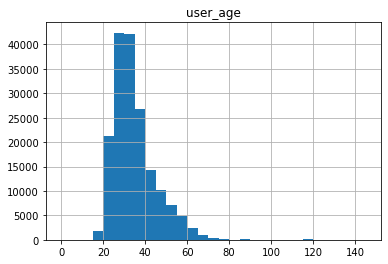

In [22]:
# check age values by creating a histogram
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

age_bins = np.arange(0,df_clean.user_age.max()+5, 5)
df_clean.hist(column = 'user_age', bins= age_bins )

In [23]:
#check with value_counts method. There are a few outlier (109, 141 etc..)
df_clean.user_age.value_counts()

31.0     10236
26.0      9325
30.0      8972
29.0      8658
28.0      8498
         ...  
89.0         1
92.0         1
91.0         1
109.0        1
141.0        1
Name: user_age, Length: 75, dtype: int64

In [24]:
df_clean.user_age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: user_age, dtype: float64

In [25]:
# %99.9 of users under age 86 
df_clean.user_age.describe(percentiles = [.999])

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
50%          32.000000
99.9%        86.000000
max         141.000000
Name: user_age, dtype: float64

In [26]:
# drop outlier values for user_age. According to histogram and descriptive stats, we can clean under age 85. 
df_clean = df_clean.query('user_age <= 85')

In [27]:
df_clean.user_age.describe()

count    174960.000000
mean         34.123382
std           9.879157
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          85.000000
Name: user_age, dtype: float64

##### Define : Birth date and user age must be int. Convert to int format

#### Code 

In [28]:
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)
df_clean.user_age = df_clean.user_age.astype(int)

#### Test

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174960 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174960 non-null  int64         
 1   start_time               174960 non-null  datetime64[ns]
 2   end_time                 174960 non-null  datetime64[ns]
 3   start_station_id         174960 non-null  object        
 4   start_station_name       174765 non-null  object        
 5   start_station_latitude   174960 non-null  float64       
 6   start_station_longitude  174960 non-null  float64       
 7   end_station_id           174960 non-null  object        
 8   end_station_name         174765 non-null  object        
 9   end_station_latitude     174960 non-null  float64       
 10  end_station_longitude    174960 non-null  float64       
 11  bike_id                  174960 non-null  object        
 12  user_type       

In [30]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60


#### Define: add a new column to calculate riding duration in minute for more readable graph & analyze

#### Code

In [31]:
df_clean['duration_minute'] = df_clean.duration_sec/60

In [32]:
df_clean.duration_minute = df_clean.duration_minute.astype(int)

#### Test

In [33]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age,duration_minute
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,869
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,608
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,26
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,29


#### Define: add new columns to calculate riding data by month, day and hour. 

#### Code 

In [34]:
# create month column 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html

df_clean['riding_month'] = df_clean.start_time.dt.strftime('%B')

In [35]:
# create day column 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html

df_clean['riding_day'] = df_clean.start_time.dt.strftime('%A')

In [36]:
# create hour column 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html

df_clean['riding_hour'] = df_clean.start_time.dt.strftime('%H')


#### Test

In [37]:
df_clean.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age,duration_minute,riding_month,riding_day,riding_hour
50803,268,2019-02-21 18:43:46.852,2019-02-21 18:48:14.864,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,246.0,Berkeley Civic Center,37.869060,...,5785,Subscriber,1993,Other,No,26,4,February,Thursday,18
27415,586,2019-02-25 09:38:46.414,2019-02-25 09:48:33.322,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,25.0,Howard St at 2nd St,37.787522,...,6279,Subscriber,1989,Male,No,30,9,February,Monday,09
104370,825,2019-02-14 08:31:06.304,2019-02-14 08:44:52.052,116.0,Mississippi St at 17th St,37.764802,-122.394771,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,5004,Subscriber,1988,Female,No,31,13,February,Thursday,08
28029,622,2019-02-25 08:58:09.918,2019-02-25 09:08:32.133,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,343.0,Bryant St at 2nd St,37.783172,...,1334,Subscriber,1982,Male,No,37,10,February,Monday,08
112725,663,2019-02-12 14:23:45.784,2019-02-12 14:34:49.222,16.0,Steuart St at Market St,37.794130,-122.394430,47.0,4th St at Harrison St,37.780955,...,6217,Subscriber,1976,Female,No,43,11,February,Tuesday,14
176565,245,2019-02-02 11:07:40.800,2019-02-02 11:11:45.865,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,5299,Subscriber,1978,Male,No,41,4,February,Saturday,11
126807,617,2019-02-10 17:27:07.471,2019-02-10 17:37:25.446,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,285.0,Webster St at O'Farrell St,37.783521,...,5235,Customer,1966,Male,No,53,10,February,Sunday,17
38853,1964,2019-02-23 10:35:46.728,2019-02-23 11:08:31.434,71.0,Broderick St at Oak St,37.773063,-122.439078,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,5039,Customer,1988,Male,No,31,32,February,Saturday,10
2330,917,2019-02-28 18:03:24.916,2019-02-28 18:18:42.654,355.0,23rd St at Tennessee St,37.755367,-122.388795,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,...,6418,Subscriber,1992,Male,No,27,15,February,Thursday,18
143855,363,2019-02-07 14:06:34.982,2019-02-07 14:12:38.358,218.0,DeFremery Park,37.812331,-122.285171,7.0,Frank H Ogawa Plaza,37.804562,...,4874,Subscriber,1979,Male,Yes,40,6,February,Thursday,14


In [38]:
df_clean.riding_month.value_counts()

February    174960
Name: riding_month, dtype: int64

In [39]:
# Save Clean data into a new file. 

df_clean.to_csv('fordgobike_clean.csv', index = False)

### What is the structure of your dataset?

> Original data set contains 16 different variable data about 180000 bike riding record. These records include data for February 2019. There are 16 different types of variables for each ride related with ride duration, stations & user. And also I've created some extra variables from existing data for better insights such as user age, riding month/day/hour 

### What is/are the main feature(s) of interest in your dataset?

> One of the features I care about will be which day of the week and what time of day the demand is high or low. Thus, different pricing and campaigns can be produced according to that time period. In addition, I would like to analyze the population segment where demand is high and low by looking at gender ,age distributions and customer type. Thus, we can understand more clearly who should be addressed in marketing / advertising activities. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will benefit a lot from the day,hour and duration data. In addition, gender, age & user_type will be features that I will use to classify demand. I will also benefit from the station usage data.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables.  

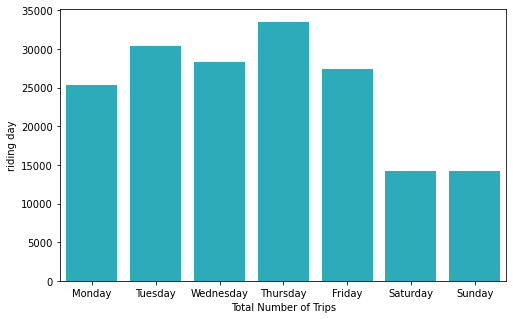

In [172]:
# riding distrubition by week days

plt.rcParams['figure.figsize'] = 8, 5

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
color_base = sb.color_palette()[9]
sb.countplot(data=df_clean,x='riding_day',color=color_base , order=days )
plt.ylabel('riding day')
plt.xlabel('Total Number of Trips')

plt.show()


Thursday & Tuesday are the most popular days. Monday,wednesday and friday counts are very close. But weekend days are obvioulsy lower than working days. 

We can say that the system is used more intensely during working days. We can work on different campaigns to increase usage on the weekend.

In [41]:
#convert riding_hour from str to int 
df_clean.riding_hour = df_clean.riding_hour.astype(int)

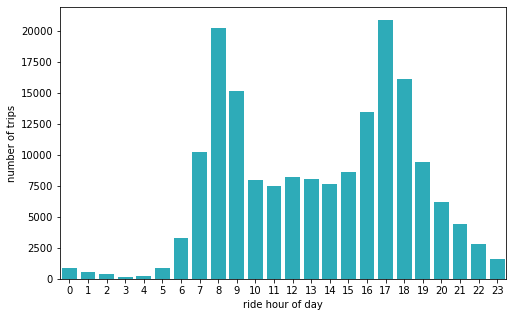

In [42]:
# riding distrubition by hours

# type_order = df_clean.riding_hour.value_counts().index # order from higher to lower
sb.countplot(data=df_clean,x=df_clean.riding_hour,color=color_base)
plt.xlabel('ride hour of day')
plt.ylabel('number of trips')
plt.show()

The histogram above is similar to a conventional workday traffic density data. It is clearly seen that there are peak hours in the system at the start (08-09) and the end (17-18) hours.

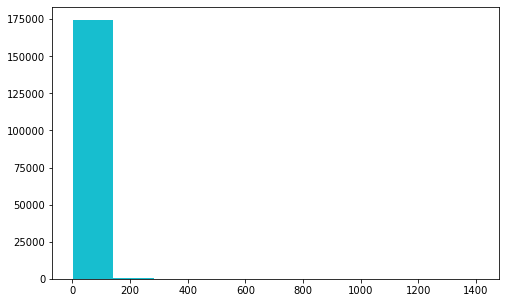

In [43]:
# trip durations in minutes

plt.hist(data = df_clean, x = 'duration_minute',color=color_base)
plt.show()

with default parameters we cant see real distrubutions of data. There are some outliers. We should edit bin edges to remove that effect. 

In [44]:
df_clean.duration_minute.describe()

count    174960.000000
mean         11.249943
std          27.374744
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_minute, dtype: float64

In [45]:
# chech for 99th percentile to define bin edges 
df_clean.duration_minute.describe(percentiles=[.99])

count    174960.000000
mean         11.249943
std          27.374744
min           1.000000
50%           8.000000
99%          53.000000
max        1409.000000
Name: duration_minute, dtype: float64

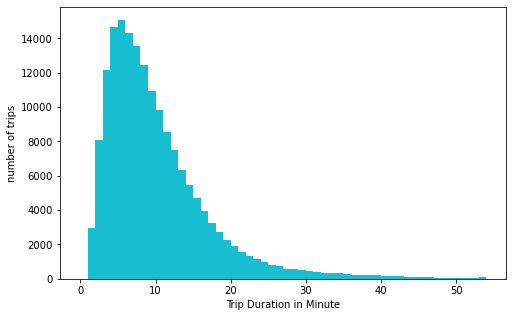

In [46]:
#trip durations in minutes

bin_edges = np.arange(0, 55,1)
plt.hist(data=df_clean, x='duration_minute', bins=bin_edges,color=color_base)

plt.xlabel('Trip Duration in Minute')
plt.ylabel('number of trips')
plt.show()

99% of the trips have times under 55 minutes. Therefore, we can clear outlivers greater than this value. In addition, the vast majority of them seem to have times between 5 and 10 minutes. It corresponds to an average usage of 11 minutes.

In [47]:
# remove outliers for duration_minute

df_clean = df_clean.query('duration_minute <= 55')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173377 entries, 4 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173377 non-null  int64         
 1   start_time               173377 non-null  datetime64[ns]
 2   end_time                 173377 non-null  datetime64[ns]
 3   start_station_id         173377 non-null  object        
 4   start_station_name       173187 non-null  object        
 5   start_station_latitude   173377 non-null  float64       
 6   start_station_longitude  173377 non-null  float64       
 7   end_station_id           173377 non-null  object        
 8   end_station_name         173187 non-null  object        
 9   end_station_latitude     173377 non-null  float64       
 10  end_station_longitude    173377 non-null  float64       
 11  bike_id                  173377 non-null  object        
 12  user_type       

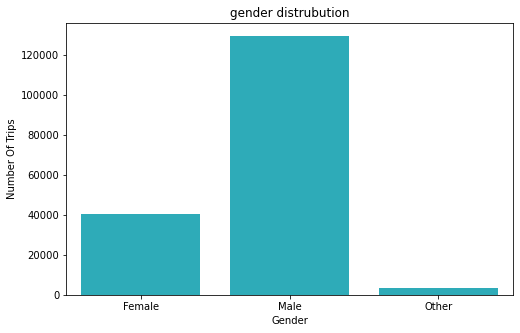

In [48]:
# gender distrubution 

sb.countplot(data=df_clean, x='member_gender', color=color_base);
plt.xlabel('Gender');
plt.ylabel('Number Of Trips');
plt.title('gender distrubution');


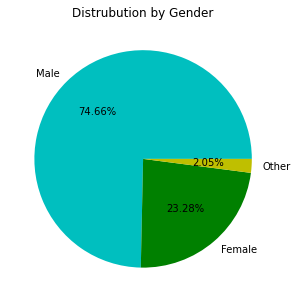

In [49]:
# pie chart & percentage calculation for gender dist 
# https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct#:~:text=autopct%20enables%20you%20to%20display,set%20to%20the%20string%20'%25.

gender_dist = df_clean.member_gender.value_counts()
plt.title('Distrubution by Gender')
plt.pie(gender_dist,labels=gender_dist.index, autopct= '%1.2f%%',colors=['c','green','y']);



The vast majority of users are male. Male with a very high rate of 74%.  

In [50]:
# Age distrubution. Check descriptive stats to define bins. 

df_clean.user_age.describe()

count    173377.000000
mean         34.118251
std           9.873658
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          85.000000
Name: user_age, dtype: float64

In [51]:
# Age distrubution , 99 percentile 

df_clean.user_age.describe(percentiles=[.99])

count    173377.000000
mean         34.118251
std           9.873658
min          18.000000
50%          32.000000
99%          63.000000
max          85.000000
Name: user_age, dtype: float64

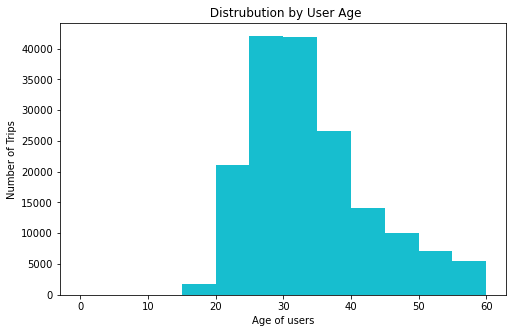

In [52]:
# Age distrubution 

bin_edges = np.arange(0, 65, 5)
plt.hist(data=df_clean,x='user_age',bins = bin_edges,color=color_base)
plt.title(" Distrubution by User Age")
plt.xlabel('Age of users')
plt.ylabel('Number of Trips');

The average age is 34. The vast majority of users fall in the 25-35 age bracket. We can say that the age range in which the working population is predominant. In fact, we can say that the usage rate peak during working hours confirms this data.

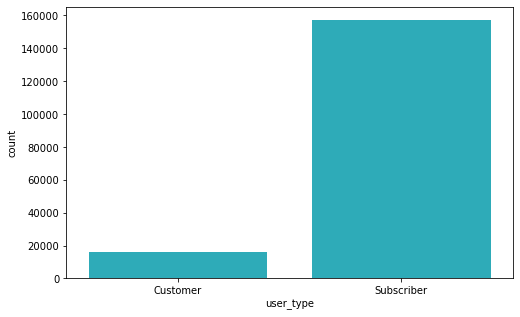

In [53]:
# user type 

sb.countplot(data=df_clean,x=df_clean.user_type,color=color_base);

Vast majority of trips are made by subscribers. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did not encounter such a big surprise. I think the cleaning phase has been efficient. I detected and cleaned outliers for the Duration variable. Again, I had to examine stats in detail to determine the correct bin edge for the age variable. Finally, I was able to create the chart correctly by making the data type int in the hour variable.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When I visualized the trip time data, I can say that it was a surprise at first. a single long bar appeared and there was no distribution of data that I could interpret. Using the describe method for detailed analysis and evaluating the percentile values, I created a histogram again, determining the correct bin edges, and a very clear data distribution emerged. And then I cleared outlier data.

## Bivariate Exploration

> In this section, I'll investigate relationships between pairs of variables in 
dataset.  

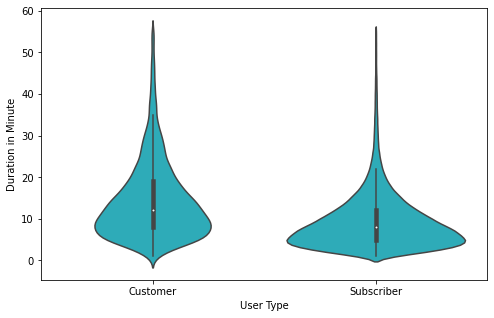

In [54]:
# Trip Duration -- Customer VS Subscriber 

sb.violinplot(data=df_clean, x='user_type', y='duration_minute', color=color_base);
plt.xlabel('User Type');
plt.ylabel('Duration in Minute');

When we look at the travel time distribution as customer vs subscriber, a clear view emerges. As can be seen clearly from the graphs, the distribution of subscribers is spread over a narrower band. In other words, subscribers make shorter and more focused journeys than customers. In contrast, customers are more diverse in distribution, meaning they usually rent bikes for longer periods of time.

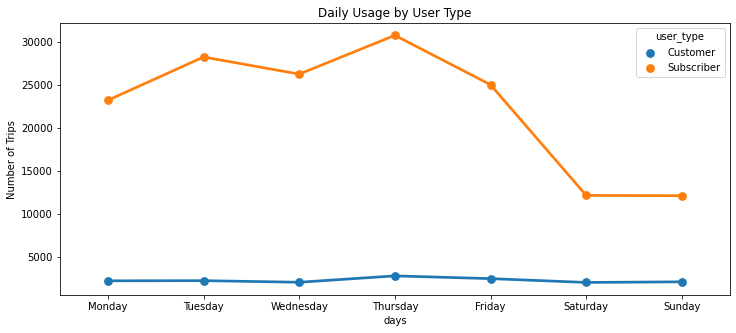

In [55]:
# Daily Total Usage -- Customer VS Subscriber 
plt.figure(figsize=(12, 5))

df_clean_user_daily = df_clean.groupby(['riding_day', 'user_type']).size().reset_index()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sb.pointplot(data=df_clean_user_daily,x='riding_day',y=0,hue='user_type',order=weekday);

plt.title('Daily Usage by User Type')
plt.xlabel('days')
plt.ylabel('Number of Trips');



As we can see from the graph, customers have lower usage numbers in terms of volume. But when we look at the daily changes, customers provide a more stable and constant usage from day to day. Subscribers, on the other hand, show heavy use on weekdays, while the intensity of use at weekends drops drastically.

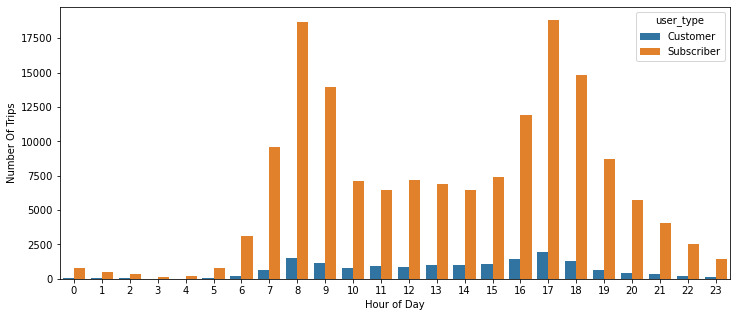

In [58]:
# Hour of Day Usage - Customer VS Subscriber 

plt.figure(figsize=(12, 5))
sb.countplot(data=df_clean, x='riding_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Number Of Trips');

We confirm the heavy use of subscribers in rush hours with this graph. We can say that there is a similar pattern in customers. They seem to use it more intensely in the afternoon.

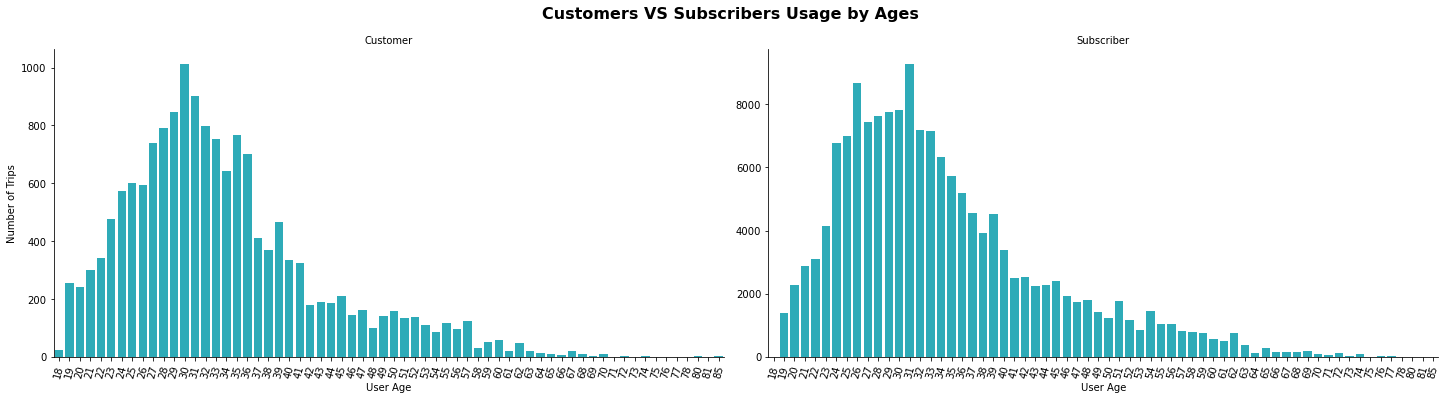

In [77]:
# Usage by Age -- Customer VS Subscriber 


graph = sb.catplot(data = df_clean, x = 'user_age', col='user_type', kind='count', sharey = False, color = color_base, height=5,aspect=2)

graph.set_axis_labels('User Age', 'Number of Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Customers VS Subscribers Usage by Ages', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

It is observed that the use of the younger population is more intense in both groups. While the peak is around 32 for customers, there are two peaks around 25 and 31 for subscribers. The subscriber user group shows a wider distribution over the age of fiftie.



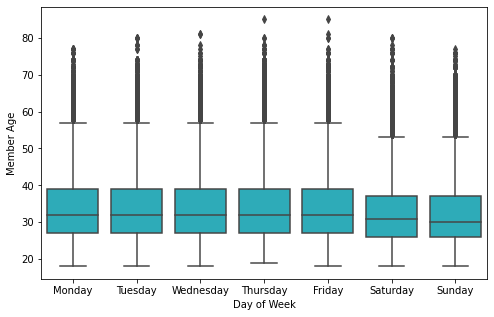

In [63]:
# User age by weekdays 

sb.boxplot(data=df_clean, x='riding_day', y='user_age', color=color_base,order=weekday);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');


Those who use weekdays are slightly older. This is another graphic that confirms that the working population on weekdays use it more intensively.

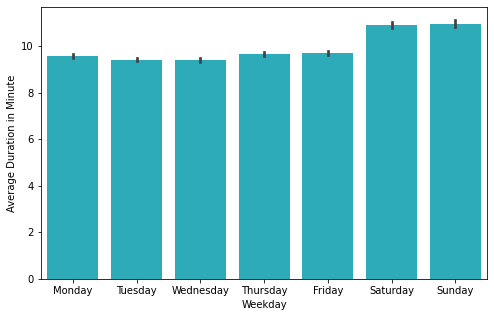

In [76]:
# Daily Average Duration 

sb.barplot(data=df_clean, x='riding_day', y='duration_minute', color=color_base,order=weekday);
plt.xlabel('Weekday');
plt.ylabel('Average Duration in Minute');

Although the number of weekend uses is decreasing, the average usage time per trip is increasing.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When we included the user type in the analysis, I observed that there were different sets of behavior between the two groups. Although the subcribers are shorter, they make a much larger number of trips. Also, subscribers make more trips on weekdays than on weekends. All these data show that subscribers are generally from the working segment and are used for transportation purposes. The hourly usage graph also confirms this inference. Especially during the starting / ending hours of the work, the number of usage is peak.

>When we analyze according to age data, the use of weekends is made by relatively younger people, which confirms our thesis above. In addition, the age range in which the usage is most intense shows a wide distribution between 25 and 32 for subscribers, while there is a narrower peak between 30-32 for customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The number of usage decreases significantly on the weekends. However, when we look at the average times per use, we see an increase. In fact, we can say that those who prefer to use it on the weekend use it longer. This makes us think that it is mostly used for trips on the weekend.

## Multivariate Exploration



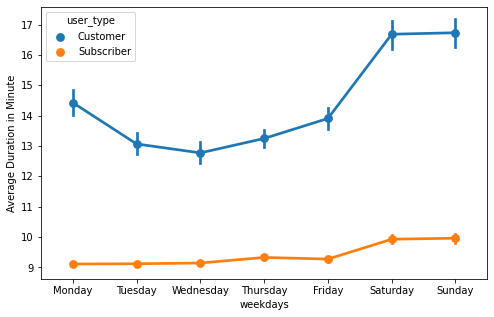

In [153]:
# Daily Average Duration by user type 

sb.pointplot(data=df_clean, x='riding_day', y='duration_minute', hue='user_type',order=weekday);
plt.xlabel('weekdays');
plt.ylabel('Average Duration in Minute');

The average usage time is increasing for all users over the weekend, but the rate of increase in customers is higher than others. The increase in subscribers is at a minimal level. Customers use the average minimum on Wednesday.

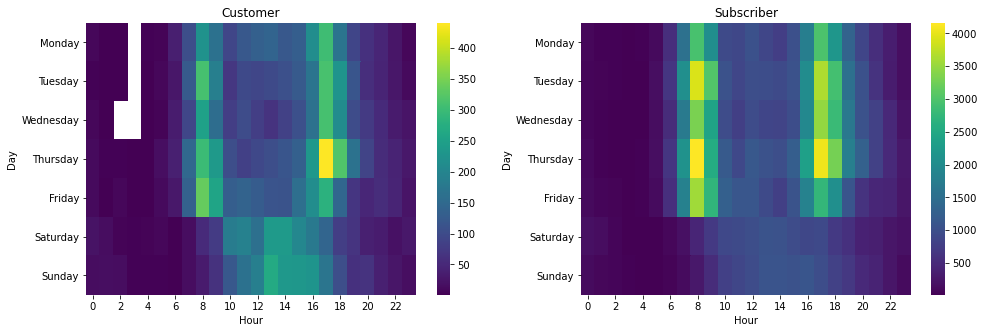

In [148]:
# Hourly Usage during Weekdays for Customers and Subscribers

#https://seaborn.pydata.org/tutorial/color_palettes.html
#https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html

plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"')
customer_counts = df_customer.groupby(['riding_day', 'riding_hour']).size()
customer_counts = customer_counts.reset_index(name='count')
customer_counts = customer_counts.pivot(index='riding_day', columns='riding_hour', values='count')
customer_counts = customer_counts.reindex(weekday)
sb.heatmap(customer_counts, cmap='viridis');
plt.title('Customer', loc='center');
plt.xlabel('Hour');
plt.ylabel('Day');

plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"')
subs_counts = df_subscriber.groupby(['riding_day', 'riding_hour']).size()
subs_counts = subs_counts.reset_index(name='count')
subs_counts = subs_counts.pivot(index='riding_day', columns='riding_hour', values='count')
subs_counts = subs_counts.reindex(weekday)
sb.heatmap(subs_counts, cmap='viridis');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour');
plt.ylabel('Day');
plt.subplots_adjust(right=1.7)

Clear visual analysis for popular hours by user type. 

''

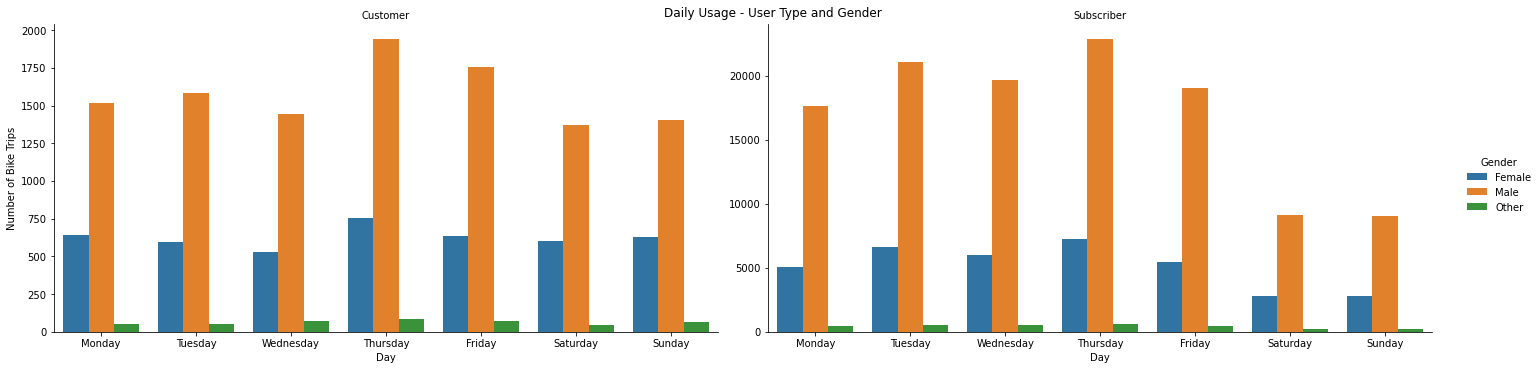

In [166]:
# daily usage - user type and gender

graph = sb.catplot(data=df_clean, x='riding_day', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=2,order=weekday);

graph.set_axis_labels("Day", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Daily Usage - User Type and Gender');
;

Famale & male has very similiar patterns in both group. However, unlike the others, only the customer/female shows the same demand on weekends as on weekdays. In other groups, demand decreases over the weekend.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It can be said that there is a density of around 8 and 17 on weekdays for two of the customers and subscribers. However, this is experienced at a higher intensity in subscribers. Customers have a relatively homogeneous distribution. On the weekend, it seems clear that customers prefer the afternoon time zone. But it shows a more homogeneous distribution compared to weekdays.

> Customer/female shows the same demand on weekends as on weekdays. In other groups, demand decreases over the weekend.

### Were there any interesting or surprising interactions between features?

> Despite the decrease in the total number of trips over the weekend, there is a significant increase in avg duration for the customer group on the weekend. The demand of the customer group is increasing over the weekend. This can be considered as an opportunity and can be used to balance the total decline with the right marketing.